![alt text](http://drive.google.com/uc?export=view&id=1rQxlZ7HwM42FM3-bjiM0wZdeb0QiWN-p)

# **Time Series Forecasting Using Long Short-Term Memory (LSTM) from Scratch in Python**

Time series forecasting is a critical problem in many domains, such as finance, weather prediction, energy demand forecasting, and inventory management. Accurate predictions can lead to better decision-making, resource optimization, and cost savings. Among the various techniques available for time series analysis, Long Short-Term Memory (LSTM) networks stand out as a powerful tool due to their ability to capture long-term dependencies and patterns in sequential data.

While popular deep learning frameworks like TensorFlow and PyTorch offer powerful tools for building LSTM models, understanding the inner workings of LSTM by building it from scratch provides invaluable insights. This tutorial takes a foundational approach, where we implement an LSTM-based model for time series forecasting entirely in Python, without relying on TensorFlow or PyTorch. This hands-on guide will help you grasp the mechanics of LSTM and the intricacies of time series forecasting.

By the end of this tutorial, you will:

1. Understand the core principles of time series forecasting.
2. Explore the mathematical foundations of LSTM networks.
4. Implement a basic LSTM model from scratch using NumPy.
5. Train and evaluate the LSTM model on a real-world time series dataset.

### **What is Time Series Forecasting?**

Time series forecasting is a technique used to predict future values based on previously observed data points that are sequentially recorded over time. The goal is to model the underlying patterns and trends in the data, such as seasonality, trends, and cyclic behaviors, to make informed predictions about future outcomes.

### **Key Characteristics of Time Series Data**
1. **Temporal Order**: Time series data is inherently ordered, meaning the sequence of data points matters.
   - Example: Daily stock prices, monthly rainfall, or yearly GDP growth.
2. **Dependency on Past Values**: Future values in the sequence often depend on previous values.
3. **Patterns**:
   - **Trend**: Long-term increase or decrease in the data.
   - **Seasonality**: Recurring patterns due to periodic factors (e.g., monthly sales cycles).
   - **Noise**: Random fluctuations or irregularities in the data.



### **Applications of Time Series Forecasting**
Time series forecasting is widely used across industries to make predictions and guide decision-making. Common applications include:
- **Finance**: Predicting stock prices, exchange rates, or portfolio risk.
- **Retail**: Forecasting product demand or sales volumes.
- **Weather**: Predicting temperature, rainfall, or storm patterns.
- **Energy**: Estimating electricity consumption or renewable energy generation.
- **Healthcare**: Predicting patient inflow or disease progression.
- **Economics**: Modeling GDP, unemployment rates, or inflation trends.



### **How Does Time Series Forecasting Work?**
The forecasting process involves the following steps:

1. **Data Collection**: Gather sequential data points recorded over time.
   - Example: Daily website traffic or hourly power consumption.
   
2. **Exploratory Data Analysis (EDA)**:
   - Visualize the data to identify trends, seasonality, and anomalies.
   - Example tools: Line plots, autocorrelation plots, and decomposition.

3. **Data Preprocessing**:
   - Handle missing values, outliers, and noisy data.
   - Normalize or scale data for consistency.

4. **Modeling**:
   - Select a model that fits the data.
   - Models range from statistical approaches to machine learning and deep learning.
     - **Statistical Models**: ARIMA, SARIMA, Exponential Smoothing.
     - **Machine Learning**: Random Forests, Gradient Boosting.
     - **Deep Learning**: LSTM, GRU, Transformers.

5. **Training**:
   - Train the model on historical data to learn the underlying patterns.

6. **Evaluation**:
   - Test the model on unseen data to evaluate its performance using metrics like Mean Absolute Error (MAE) or Root Mean Square Error (RMSE).

7. **Forecasting**:
   - Use the trained model to predict future values.


### **Challenges in Time Series Forecasting**

- **Non-stationarity**: Time series data often changes over time (e.g., due to seasonality or trends), making it difficult to model.
- **High Variability**: Noise and irregular patterns can obscure meaningful signals.
- **Data Quantity**: Limited data can lead to poor generalization, while too much data can require significant computational resources.
- **Long-Term Dependencies**: Capturing long-term dependencies requires sophisticated models like LSTMs or Transformers.

### **Conclusion**
Time series forecasting plays a crucial role in decision-making by providing insights into future trends and patterns. By leveraging tools and techniques suited to the specific characteristics of the data, organizations can achieve accurate and actionable predictions for a wide range of applications.

## **LSTM Model**

Long Short-Term Memory (LSTM) is a type of recurrent neural network (RNN) architecture used in the field of deep learning. It is particularly well-suited for sequence prediction problems because it can capture long-term dependencies in data. LSTMs are designed to overcome the limitations of traditional RNNs, which struggle with learning long-range dependencies due to issues like vanishing and exploding gradients.

The architecture of an **LSTM** (Long Short-Term Memory) network centers around the LSTM cell, which is the building block of the network. Each LSTM cell processes data sequentially and is designed to address the limitations of standard RNNs by using gates to control the flow of information.

Here’s a detailed description of the LSTM architecture:


### **1. LSTM Cell Structure**
An LSTM cell consists of the following components:

1. **Cell State ($\mathbf{c}_t$):**
   - A linear memory that flows through the network with minimal modifications.
   - Acts as the "long-term memory" of the LSTM.

2. **Hidden State ($\mathbf{h}_t$):**
   - The output of the LSTM cell at timestep $t$.
   - Acts as the "short-term memory" and is passed to the next timestep.

3. **Gates:**
   - The flow of information is regulated by three gates:
     - **Forget Gate** ($\mathbf{f}_t$)
     - **Input Gate** ($\mathbf{i}_t$)
     - **Output Gate** ($\mathbf{o}_t$)

---

### **2. LSTM Cell Workflow**

At each timestep $t$:
1. **Inputs:**
   - $\mathbf{x}_t$: Input vector at timestep $t$.
   - $\mathbf{h}_{t-1}$: Hidden state from the previous timestep.
   - $\mathbf{c}_{t-1}$: Cell state from the previous timestep.

2. **Gate Calculations:**

  - **Forget Gate ($\mathbf{f}_t$):**

     Determines which parts of the previous cell state $\mathbf{c}_{t-1}$ to retain.
     
  $$ \mathbf{f}_t = \sigma(\mathbf{W}_f [\mathbf{h}_{t-1}, \mathbf{x}_t] + \mathbf{b}_f) $$

   - **Input Gate ($\mathbf{i}_t$):**

     Controls what new information to add to the cell state.
    
  $$ \mathbf{i}_t = \sigma(\mathbf{W}_i [\mathbf{h}_{t-1}, \mathbf{x}_t] + \mathbf{b}_i) $$
  
  - **Candidate Cell State ($\tilde{\mathbf{c}}_t$):**

     Computes a new candidate for the cell state.
     

  $$ \tilde{\mathbf{c}}_t = \tanh(\mathbf{W}_c [\mathbf{h}_{t-1}, \mathbf{x}_t] + \mathbf{b}_c) $$

     
  - **Output Gate ($\mathbf{o}_t$):**
     Decides how much of the updated cell state to output.
    
  $$ \mathbf{o}_t = \sigma(\mathbf{W}_o [\mathbf{h}_{t-1}, \mathbf{x}_t] + \mathbf{b}_o) $$

3. **Cell State Update ($\mathbf{c}_t$):**

   Combines the forget gate, input gate, and candidate cell state to update $\mathbf{c}_t$:

  $$ \mathbf{c}_t = \mathbf{f}_t \odot \mathbf{c}_{t-1} + \mathbf{i}_t \odot \tilde{\mathbf{c}}_t $$


4. **Hidden State Update( $\mathbf{h}_t$):**
   Combines the updated cell state and output gate to compute $\mathbf{h}_t$:

  $$ \mathbf{h}_t = \mathbf{o}_t \odot \tanh(\mathbf{c}_t) $$


---

### **3. Architectural Layout**

In an LSTM network:

1. **Input Layer:**
   - The input data $\mathbf{x}_t$ is fed into the network one timestep at a time.

2. **Hidden Layers:**

   - Composed of multiple LSTM cells arranged sequentially.
   - Each LSTM cell takes the input $\mathbf{x}_t$, previous hidden stat $\mathbf{h}_{t-1}$, and previous cell state $\mathbf{c}_{t-1}$, and computes the current states $\mathbf{h}_t$ and $\mathbf{c}_t$.

3. **Output Layer:**

   - The hidden state $\mathbf{h}_t$ from the final LSTM cell can be passed to a fully connected (dense) layer for tasks like classification or regression.





### LSTM Cell Architecture

```
            x_t (input)
              |
              V
        +-------------+
        |             |
        |  Forget     |          C_{t-1} (Previous cell state)
        |  Gate       |            |
        +-------------+            |
              |                    |
              V                    V
        +-------------+    +----------------+          +-------------+
        |             |    |                |          |  Output     |
        | Input Gate  |    |   Cell State   |          |  Gate       |
        |             |    |  Update        |          |             |
        +-------------+    +----------------+          +-------------+
              |                    |                          |
              V                    |                          V
        +-------------+            |                    +-------------+
        |             |            |                    |             |
        |  Candidate  |            |                    |  New Hidden |
        |  Values     |            |                    |  State      |
        +-------------+            |                    +-------------+
              |                    |                          |
              V                    V                          V
        +-------------+    +----------------+          +-------------+
        |             |    |                |          |             |
        |  Update     |----|   Combine      |----------|             |
        |  Cell State |    |  Cell State    |          |             |
        +-------------+    |                |          +-------------+
              |            +----------------+                |
              V                                             V
            C_t (New cell state)                      h_t (New hidden state)
```

### Explanation of Each Component:

1. **Forget Gate**:
   - **Equation**: $f_t = \sigma(W_f \cdot [h_{t-1}, x_t] + b_f)$
   - **Description**: Decides what information to discard from the previous cell state $C_{t-1}$.

2. **Input Gate**:
   - **Equation**: $i_t = \sigma(W_i \cdot [h_{t-1}, x_t] + b_i)$
   - **Description**: Determines which parts of the new candidate values should be added to the cell state.

3. **Candidate Cell State (New Information)**:
   - **Equation**: $\tilde{C}_t = \tanh(W_C \cdot [h_{t-1}, x_t] + b_C)$
   - **Description**: Generates new candidate values for the cell state.

4. **Cell State Update**:
   - **Equation**: $C_t = f_t \cdot C_{t-1} + i_t \cdot \tilde{C}_t$
   - **Description**: Combines the forget gate, input gate, and candidate values to update the cell state.

5. **Output Gate**:
   - **Equation**: $o_t = \sigma(W_o \cdot [h_{t-1}, x_t] + b_o)$
   - **Description**: Determines the new hidden state based on the updated cell state.

6. **New Hidden State**:
   - **Equation**: $h_t = o_t \cdot \tanh(C_t)$
   - **Description**: The output of the LSTM cell for the current time step.

This architecture allows LSTM cells to effectively capture long-term dependencies by maintaining and updating the cell state $C_t$ over time, while using the hidden state $h_t$ to pass relevant information to the next time step.


![alt text](http://drive.google.com/uc?export=view&id=1GJKGIBYx7gV2cpdVIRhVKUWV4Gqii6MX)


source: https://medium.com/analytics-vidhya/introduction-to-long-short-term-memory-lstm-a8052cd0d4cd


### **Key Properties of LSTM Architecture**

1. **Gates enable selective memory updates.**
2. **Cell state ensures a constant flow of important information.**
3. **Hidden state captures short-term dependencies.**
4. **Multiple LSTM layers can be stacked for hierarchical feature extraction.**

This architecture allows LSTMs to effectively learn and model long-term dependencies in sequential data.

## **Univariate Time Series Forecasting Using LSTM from Scratch**

In this excersise will use time series monthy commodity price data create a univariate LSTM to forcast rice price. Since we cannot use TensorFlow or PyTorch, we will implement a basic LSTM model from scratch using NumPy.  

### Load Packages

In [ ]:
import numpy as np
from numpy import concatenate

from matplotlib import pyplot
import matplotlib.pylab as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import plotly.graph_objects as go
import plotly.io as pio

import math, time
from math import sqrt
import random
import numpy as np
from numpy import concatenate

import pandas as pd
from pandas import read_csv
from pandas import DataFrame
from pandas import concat

from datetime import datetime, timedelta
from matplotlib import pyplot
import matplotlib.pylab as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

### **Data**

In this exercise, we will use monthly time series data on commodity prices from Index Mundi and the Volatility Index (VIX Index). The VIX Index is the benchmark index designed to measure the market’s expectation of future volatility. It is based on options of the S&P 500 Index, which is considered the leading indicator of the broad U.S. stock market. We will forecast rice prices six months ahead using Long Short-Term Memory (LSTM) networks. The LSTM will be built from scratch using the `numpy`, `pandas`, and `math` packages.

In [ ]:
# Load the dataset
url = 'https://github.com/ahhmed207/r-colab/blob/main/Data/Machine_Learning/monthly_price.csv?raw=true'
df = pd.read_csv(url)
df.head()

,MONTH,TIME,Food_Price_Index,Crude_Oil_Price,Urea_Price,TSP_Price,MP_Price,VIX_Index,Rice_Price,Wheat_Price,Maize_Price,Soybean_Price
0,Mar-92,Mar-92,55.55,17.45,120.0,120.0,110.0,17.52,277.2,179.04,117.00,434.0
1,Apr-92,Apr-92,54.07,18.63,120.0,120.2,110.0,16.56,278.0,168.96,108.52,425.0
2,May-92,May-92,54.16,19.50,120.0,120.5,110.0,15.08,274.0,164.20,109.64,439.0
3,Jun-92,Jun-92,54.82,20.83,120.0,120.5,110.0,15.20,268.8,164.60,110.90,456.0
4,Jul-92,Jul-92,53.74,20.17,120.0,120.5,110.0,13.60,278.5,155.25,102.75,429.0


In [ ]:
# Select MONTH and Rice
df = df[['MONTH','Rice_Price']]
df.head()
# Reorder column
column_names = ['MONTH','Rice_Price']
df = df.reindex(columns=column_names)
df.head()

,MONTH,Rice_Price
0,Mar-92,277.2
1,Apr-92,278.0
2,May-92,274.0
3,Jun-92,268.8
4,Jul-92,278.5


### **Univariate Time Series Data Visualization**

This Python script uses the **Plotly** library to create an interactive line chart displaying monthly rice prices. Here's an explanation of the code step by step:

**1. Importing Required Libraries**
```python
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'colab'
```
- **`plotly.graph_objects`**: Provides a low-level interface for creating and customizing figures.
- **`plotly.io`**: Used to manage rendering settings.
- **`pio.renderers.default = 'colab'`**: Configures the renderer to display figures in Google Colab. for jupyter notebook '**notebook**'


**2. Creating a Figure**
```python
fig = go.Figure()
```
- **`go.Figure()`**: Initializes an empty figure to which you can add traces (data) and customize layouts.


**3. Adding a Line Plot Trace**
```python
fig.add_traces(go.Scatter(x=df['MONTH'], y=df['Rice_Price'], mode='lines', name='Training Data'))
```
- **`go.Scatter`**: Creates a scatter plot, which can also be used for line plots by setting `mode='lines'`.
  - **`x=df['MONTH']`**: Specifies the x-axis data, which is the column `MONTH` in the DataFrame `df`.
  - **`y=df['Rice_Price']`**: Specifies the y-axis data, which is the column `Rice_Price` in `df`.
  - **`mode='lines'`**: Indicates that the data should be plotted as a continuous line.
  - **`name='Training Data'`**: Adds a label for this trace in the legend.

**4. Updating the Layout**
```python
fig.update_layout(
    width=900, height=600,
    xaxis_title="Months", yaxis_title="Price (US $/MT.)",
    title={"text": "Monthly Rice Price", "x": 0.5, "pad": {'b': 0, 'l': 0, 't': 0, 'r': 0}},
    legend={'yanchor': 'top', 'y': 0.99, 'xanchor': 'center', 'x': 0.5}
)

- **Figure Dimensions**:
  - **`width=900, height=600`**: Sets the width and height of the figure.

- **Axes Titles**:
  - **`xaxis_title="Months"`**: Sets the title for the x-axis.
  - **`yaxis_title="Price (US $/MT.)"`**: Sets the title for the y-axis.

- **Figure Title**:
  - **`title={"text": "Monthly Rice Price", "x": 0.5}`**:
    - **`text`**: Sets the title text to "Monthly Rice Price".
    - **`x=0.5`**: Centers the title horizontally.
    - **`pad`**: Adjusts padding around the title.

- **Legend Positioning**:
  - **`legend={'yanchor': 'top', 'y': 0.99, 'xanchor': 'center', 'x': 0.5}`**:
    - **`yanchor='top', y=0.99`**: Aligns the legend box to the top of the figure.
    - **`xanchor='center', x=0.5`**: Centers the legend horizontally.

---

**5. Displaying the Figure**
```python
fig.show()
```
- **`fig.show()`**: Renders and displays the interactive plot.



### **Output**
- **Graph Type**: An interactive line plot.
- **X-axis**: Months from the `df['MONTH']` column.
- **Y-axis**: Rice prices from the `df['Rice_Price']` column (in USD per metric ton).
- **Legend**: "Training Data" label is displayed above the graph.



#### Code:

In [ ]:
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default='colab'


fig = go.Figure()
fig.add_traces(go.Scatter(x = df['MONTH'], y=df['Rice_Price'], mode='lines', name='Training Data'))
fig.update_layout(width=900, height=600,
                      xaxis_title = "Months", yaxis_title = "Price (US $/MT.)",
                      title = {"text": "Monthly Rice Price", "x":0.5, "pad": {'b':0, 'l':0, 't':0, 'r':0}},
                      legend = {'yanchor':'top', 'y':0.99, 'xanchor':'center', 'x':0.5})
# Display the figure
fig.show()

### **Data Processing**

In [ ]:
# Variables for training (Univariate)
cols = list(df)[1:]
price_df = df[cols].astype(float)
price_df.head()

,Rice_Price
0,277.2
1,278.0
2,274.0
3,268.8
4,278.5


#### **Scale Data**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler = scaler.fit(price_df)
price_scaled = scaler.transform(price_df)

#### **Convert Series to Supervised Learning**

As required for LSTM networks, we require to reshape an input data into n_samples x timesteps x n_features. In this example, the n_features is 5. We will make timesteps = 6 (past six month  used for training).

The code below defines a Python function named `create_sequences` that prepares sequential data for time series forecasting. It creates input (`X_data`) and output (`y_data`) sequences along with a corresponding list of months (`month`). This function is particularly useful for building datasets for models like LSTMs, which require sequential data.

**1. Function Definition**
```python
def create_sequences(data, n_future, n_past):
```
- **`data`**: The input dataset containing time series data.
- **`n_future`**: The number of future time steps to predict.
- **`n_past`**: The number of past time steps to use as input for making predictions.

**2. Initializing Empty Lists**
```python
X_data = []
y_data = []
month = []
month_df = df['MONTH']
```
- **`X_data`**: Stores input sequences (past data).
- **`y_data`**: Stores output sequences (target future values).
- **`month`**: Stores the corresponding months for the predicted values.
- **`month_df = df['MONTH']`**: Extracts the `MONTH` column from the DataFrame `df`, which contains date or time information.

**3. Loop to Create Sequences**
```python
for i in range(n_past, len(price_df) - n_future + 1):
```
- **`range(n_past, len(price_df) - n_future + 1)`**: The loop starts at `n_past` and stops when there aren't enough future values left for prediction (`len(price_df) - n_future + 1`).

Inside the loop:
- The function slices the dataset to extract input (`X_data`) and output (`y_data`) sequences for each time window.

 **4. Extracting Months**
```python
month.append(month_df[i + n_future - 1:i + n_future])
```
- Appends the corresponding month for the predicted value to the `month` list.
- **`i + n_future - 1`**: Identifies the index of the month corresponding to the prediction.

**5. Creating Input Data (`X_data`)**
```python
X_data.append(price_scaled[i - n_past:i, 0:price_scaled.shape[1]])
```
- Extracts a sequence of the last `n_past` time steps from `price_scaled`.
- **`price_scaled[i - n_past:i, 0:price_scaled.shape[1]]`**:
  - **`i - n_past:i`**: Selects rows corresponding to the last `n_past` time steps.
  - **`0:price_scaled.shape[1]`**: Selects all columns of the data (assuming multivariate input).

 **6. Creating Output Data (`y_data`)**
```python
y_data.append(price_scaled[i + n_future - 1:i + n_future, 0])
```
- Extracts the future value to predict.
- **`i + n_future - 1:i + n_future`**: Selects the row corresponding to the future time step.
- **`0`**: Assumes the first column contains the target variable.

**7. Converting Lists to Numpy Arrays**
```python
return np.array(month), np.array(X_data), np.array(y_data)
```
- Converts the `month`, `X_data`, and `y_data` lists into Numpy arrays for efficient computation.


#### Code:

In [ ]:
### Sequence generator function

def create_sequences(data, n_future, n_past):
    X_data = []
    y_data = []
    month=[]
    month_df=df['MONTH']
    for i in range(n_past, len(price_df) - n_future +1):
        month.append(month_df[i + n_future-1:i + n_future])
        X_data.append(price_scaled[i - n_past:i, 0:price_scaled.shape[1]])
        y_data.append(price_scaled[i + n_future - 1:i + n_future, 0])

    return np.array(month), np.array(X_data), np.array(y_data)

In [ ]:
n_future = 1   # Number of months we want to look into the future based on the past month.
n_past = 6     # Number of past months we want to use to predict the future.

month, X_data, y_data = create_sequences(price_scaled, n_future, n_past)
month.shape, X_data.shape, y_data.shape

((356, 1), (356, 6, 1), (356, 1))

### **Split Data to Training/Validation/Test**

This code snippet is splitting a dataset into **training**, **validation**, and **test** sets. It uses predefined sequences (`month`, `X_data`, `y_data`) to partition the data based on proportions of the total dataset. The sizes of these splits are 80% for training, 10% for validation, and 10% for testing.

**1. Calculate Splitting Indices**
```python
q_80 = int(len(df['MONTH']) * .8)
q_90 = int(len(df['MONTH']) * .9)
```
- **`q_80`**: The index where the first 80% of the data ends.
  - Calculated as 80% of the total number of rows in the `df['MONTH']` column.
- **`q_90`**: The index where the first 90% of the data ends (80% + 10% for validation).
  - Calculated as 90% of the total number of rows.

**2. Split the Data**
```python
month_train, X_train, y_train = month[:q_80], X_data[:q_80], y_data[:q_80]
month_val, X_val, y_val = month[q_80:q_90], X_data[q_80:q_90], y_data[q_80:q_90]
month_test, X_test, y_test = month[q_90:], X_data[q_90:], y_data[q_90:]
```
- **Training Set (`month_train`, `X_train`, `y_train`)**:
  - Uses the first 80% of the data.
  - **`month[:q_80]`**: Corresponding months.
  - **`X_data[:q_80]`**: Input sequences for training.
  - **`y_data[:q_80]`**: Target output values for training.

- **Validation Set (`month_val`, `X_val`, `y_val`)**:
  - Uses the next 10% of the data (between 80% and 90%).
  - **`month[q_80:q_90]`**: Corresponding months.
  - **`X_data[q_80:q_90]`**: Input sequences for validation.
  - **`y_data[q_80:q_90]`**: Target output values for validation.

- **Test Set (`month_test`, `X_test`, `y_test`)**:
  - Uses the last 10% of the data.
  - **`month[q_90:]`**: Corresponding months.
  - **`X_data[q_90:]`**: Input sequences for testing.
  - **`y_data[q_90:]`**: Target output values for testing.

```python
month_train.shape, X_train.shape, y_train.shape, month_val.shape, X_val.shape, y_val.shape, month_test.shape, X_test.shape, y_test.shape
```
- **`shape`**: Returns the dimensions of each dataset.
  - `month_*`: 1D arrays containing months for each split.
  - `X_*`: 3D arrays with shapes `(num_samples, n_past, num_features)` (input sequences for each split).
  - `y_*`: 2D arrays with shapes `(num_samples, 1)` (target outputs for each split).



#### Code:

In [ ]:
q_80 = int(len(df['MONTH']) * .8)
q_90 = int(len(df['MONTH']) * .9)

month_train, X_train, y_train = month[:q_80], X_data[:q_80], y_data[:q_80]
month_val, X_val, y_val = month[q_80:q_90], X_data[q_80:q_90], y_data[q_80:q_90]
month_test, X_test, y_test = month[q_90:], X_data[q_90:], y_data[q_90:]

month_train.shape, X_train.shape, y_train.shape, month_val.shape, X_val.shape, y_val.shape, month_test.shape, X_test.shape, y_test.shape

((289, 1),
 (289, 6, 1),
 (289, 1),
 (36, 1),
 (36, 6, 1),
 (36, 1),
 (31, 1),
 (31, 6, 1),
 (31, 1))

#### Plot Training/Validation and Test data

The code uses Plotly to create a scatter plot visualizing training, validation, and test data with markers, labeled axes, a title, and a legend, specifically for display in Google Colab.

In [ ]:
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default='colab'

fig = go.Figure()
fig.add_traces(go.Scatter(x = month_train.flatten(), y= y_train.flatten(), mode='markers', name='Training Data'))
fig.add_traces(go.Scatter(x = month_val.flatten(), y=y_val.flatten(), mode='markers', name='Validation Data'))
fig.add_traces(go.Scatter(x = month_test.flatten(), y=y_test.flatten(), mode='markers', name='Test Data'))
fig.update_layout(width=800, height=600,
                      xaxis_title = "Months", yaxis_title = "Std. Price",
                      title = {"text": "Training, Validation & Test Data", "x":0.5, "pad": {'b':0, 'l':0, 't':0, 'r':0}},
                      legend = {'yanchor':'top', 'y':0.99, 'xanchor':'left', 'x':0.10})

### **Bulid LSTM Model Function**

We will buld a fuction step by step to fit LSTM model with time-series data.  Let's go through the `LSTM` class step by step to understand its implementation:



**1. Initialization (`__init__` Method)**

The `__init__` method sets up the initial weights, biases, and other parameters for the LSTM model.

```python
class LSTM:
    def __init__(self, input_dim, hidden_dim, output_dim, learning_rate=0.001):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.learning_rate = learning_rate

        # Xavier initialization for weights
        self.Wf = np.random.randn(hidden_dim, hidden_dim + input_dim) * np.sqrt(2.0 / (hidden_dim + (hidden_dim + input_dim)))
        self.Wi = np.random.randn(hidden_dim, hidden_dim + input_dim) * np.sqrt(2.0 / (hidden_dim + (hidden_dim + input_dim)))
        self.Wc = np.random.randn(hidden_dim, hidden_dim + input_dim) * np.sqrt(2.0 / (hidden_dim + (hidden_dim + input_dim)))
        self.Wo = np.random.randn(hidden_dim, hidden_dim + input_dim) * np.sqrt(2.0 / (hidden_dim + (hidden_dim + input_dim)))

        self.bf = np.zeros((hidden_dim, 1))
        self.bi = np.zeros((hidden_dim, 1))
        self.bc = np.zeros((hidden_dim, 1))
        self.bo = np.zeros((hidden_dim, 1))

        self.Wy = np.random.randn(output_dim, hidden_dim) * np.sqrt(2.0 / (output_dim + hidden_dim))
        self.by = np.zeros((output_dim, 1))
```

- **Parameters**:
  - `input_dim`: Dimension of the input data.
  - `hidden_dim`: Number of units in the LSTM hidden layer.
  - `output_dim`: Dimension of the output data.
  - `learning_rate`: Learning rate for the model.

- **Weights and Biases**:
  - `Wf`, `Wi`, `Wc`, `Wo`: Weight matrices for forget gate, input gate, cell state, and output gate.
  - `bf`, `bi`, `bc`, `bo`: Bias vectors for the respective gates.
  - `Wy`, `by`: Weight matrix and bias vector for the output layer.

**2. Activation Functions**

These functions define the activation functions used in the LSTM cell.

```python
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def dsigmoid(self, x):
        return self.sigmoid(x) * (1 - self.sigmoid(x))

    def tanh(self, x):
        return np.tanh(x)

    def dtanh(self, x):
        return 1 - np.tanh(x) ** 2
```

- **Sigmoid and its derivative**: Used for gates (forget, input, output).
- **Tanh and its derivative**: Used for the cell state and candidate values.

**3. Forward Pass (`forward` Method)**

This method performs the forward pass through the LSTM cell to compute the output.

```python
    def forward(self, x):
        self.batch_size = x.shape[0]
        self.timesteps = x.shape[1]

        self.h = np.zeros((self.hidden_dim, self.batch_size, self.timesteps))
        self.c = np.zeros((self.hidden_dim, self.batch_size, self.timesteps))

        self.f = np.zeros((self.hidden_dim, self.batch_size, self.timesteps))
        self.i = np.zeros((self.hidden_dim, self.batch_size, self.timesteps))
        self.c_hat = np.zeros((self.hidden_dim, self.batch_size, self.timesteps))
        self.o = np.zeros((self.hidden_dim, self.batch_size, self.timesteps))

        self.y = np.zeros((self.output_dim, self.batch_size, self.timesteps))

        for t in range(self.timesteps):
            x_t = x[:, t].T
            h_prev = self.h[:, :, t-1] if t > 0 else np.zeros((self.hidden_dim, self.batch_size))
            c_prev = self.c[:, :, t-1] if t > 0 else np.zeros((self.hidden_dim, self.batch_size))

            concat = np.vstack((h_prev, x_t))

            self.f[:, :, t] = self.sigmoid(np.dot(self.Wf, concat) + self.bf)
            self.i[:, :, t] = self.sigmoid(np.dot(self.Wi, concat) + self.bi)
            self.c_hat[:, :, t] = self.tanh(np.dot(self.Wc, concat) + self.bc)
            self.c[:, :, t] = self.f[:, :, t] * c_prev + self.i[:, :, t] * self.c_hat[:, :, t]
            self.o[:, :, t] = self.sigmoid(np.dot(self.Wo, concat) + self.bo)
            self.h[:, :, t] = self.o[:, :, t] * self.tanh(self.c[:, :, t])

            self.y[:, :, t] = np.dot(self.Wy, self.h[:, :, t]) + self.by

        return self.y[:, :, -1].T
```

- **Initialization**:
  - Initialize hidden states `h` and cell states `c`.
  - Initialize gates `f` (forget), `i` (input), `c_hat` (candidate), and `o` (output).

- **Time Step Loop**:
  - For each time step `t`:
    - Compute the current input `x_t` and previous hidden and cell states.
    - Concatenate previous hidden state and current input.
    - Compute gate activations (forget, input, candidate, output).
    - Update cell state `c` and hidden state `h`.
    - Compute the output `y`.

**4. Backward Pass (`backward` Method)**

This method performs the backward pass to compute gradients and update weights.

```python
    def backward(self, x, y_true, y_pred):
        m = y_true.shape[0]

        dy = (y_pred - y_true) / m
        dWy = np.dot(dy.T, self.h[:, :, -1].T)
        dby = np.sum(dy, axis=0, keepdims=True).T

        dh = np.dot(self.Wy.T, dy.T)
        do = dh * self.tanh(self.c[:, :, -1])
        dc = dh * self.o[:, :, -1] * self.dtanh(self.c[:, :, -1])

        dWf = np.zeros_like(self.Wf)
        dWi = np.zeros_like(self.Wi)
        dWc = np.zeros_like(self.Wc)
        dWo = np.zeros_like(self.Wo)

        dbf = np.zeros_like(self.bf)
        dbi = np.zeros_like(self.bi)
        dbc = np.zeros_like(self.bc)
        dbo = np.zeros_like(self.bo)

        for t in reversed(range(self.timesteps)):
            dc *= self.f[:, :, t]
            do = dh * self.tanh(self.c[:, :, t])
            df = dc * self.c[:, :, t-1] if t > 0 else np.zeros((self.hidden_dim, self.batch_size))
            di = dc * self.c_hat[:, :, t]
            dc_hat = dc * self.i[:, :, t]

            dWf += np.dot(df * self.dsigmoid(self.f[:, :, t]), np.vstack((self.h[:, :, t-1] if t > 0 else np.zeros((self.hidden_dim, self.batch_size)), x[:, t].T)).T)
            dWi += np.dot(di * self.dsigmoid(self.i[:, :, t]), np.vstack((self.h[:, :, t-1] if t > 0 else np.zeros((self.hidden_dim, self.batch_size)), x[:, t].T)).T)
            dWc += np.dot(dc_hat * self.dtanh(self.c_hat[:, :, t]), np.vstack((self.h[:, :, t-1] if t > 0 else np.zeros((self.hidden_dim, self.batch_size)), x[:, t].T)).T)
            dWo += np.dot(do * self.dsigmoid(self.o[:, :, t]), np.vstack((self.h[:, :, t-1] if t > 0 else np.zeros((self.hidden_dim, self.batch_size)), x[:, t].T)).T)

            dbf += np.sum(df, axis=1, keepdims=True)
            dbi += np.sum(di, axis=1, keepdims=True)
            dbc += np.sum(dc_hat, axis=1, keepdims=True)
            dbo += np.sum(do, axis=1, keepdims=True)

        self.Wf -= self.learning_rate * dWf
        self.Wi -= self.learning_rate * dWi
        self.Wc -= self.learning_rate * dWc
        self.Wo -= self.learning_rate * dWo

        self.bf -= self.learning_rate * dbf
        self.bi -= self.learning_rate * dbi
        self.bc -= self.learning_rate * dbc
        self.bo -= self.learning_rate * dbo

        self.Wy -= self.learning_rate * dWy
        self.by -= self.learning_rate * dby
```

- **Compute Gradients**:
  - Calculate the gradient of the output loss `dy`.
  - Compute gradients for weights and biases (`dWy`, `dby`, `dWf`, `dWi`, `dWc`, `dWo`, `dbf`, `dbi`, `dbc`, `dbo`).

- **Update Weights and Biases**:
  - Update weights and biases using the computed gradients and learning rate.

**5. Fit Method (`fit` Method)**

This method trains the LSTM model for a specified number of epochs.

```python
    def fit(self, X, y, epochs=100, batch_size=32):
        self.losses = []
        num_batches = X.shape[0] // batch_size

        for epoch in range(epochs):
            for batch in range(num_batches):
                start = batch * batch_size
                end = (batch + 1) * batch_size
                X_batch = X[start:end]
                y_batch = y[start:end]

                y_pred = self.forward(X_batch)
                loss = np.mean((y_pred - y_batch) ** 2)
                self.losses.append(loss)

                self.backward(X_batch, y_batch, y_pred)

            if (epoch + 1) % 10 == 0:
                print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}')
```

- **Parameters**:
  - `X`: Input data.
  - `y`: True output data.
  - `epochs`: Number of epochs to train.
  - `batch_size`: Size of each batch for training.

- **Training Loop**:
  - For each epoch, iterate over all batches.
  - Perform forward pass, compute loss, perform backward pass to update weights.
  - Print loss every 10 epochs.

**6. Predict Method (`predict` Method)**

This method predicts the output for given input data.

```python
    def predict(self, X):
        return self.forward(X)
```

- **Parameters**:
  - `X`: Input data for prediction.

- **Returns**:
  - Predicted output.

This LSTM class implements a simple LSTM network from scratch, including forward and backward passes and methods for training and prediction.

#### Code:

In [ ]:
class LSTM:
    def __init__(self, input_dim, hidden_dim, output_dim, learning_rate=0.001):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.learning_rate = learning_rate

        # Xavier initialization for weights
        self.Wf = np.random.randn(hidden_dim, hidden_dim + input_dim) * np.sqrt(2.0 / (hidden_dim + (hidden_dim + input_dim)))
        self.Wi = np.random.randn(hidden_dim, hidden_dim + input_dim) * np.sqrt(2.0 / (hidden_dim + (hidden_dim + input_dim)))
        self.Wc = np.random.randn(hidden_dim, hidden_dim + input_dim) * np.sqrt(2.0 / (hidden_dim + (hidden_dim + input_dim)))
        self.Wo = np.random.randn(hidden_dim, hidden_dim + input_dim) * np.sqrt(2.0 / (hidden_dim + (hidden_dim + input_dim)))

        self.bf = np.zeros((hidden_dim, 1))
        self.bi = np.zeros((hidden_dim, 1))
        self.bc = np.zeros((hidden_dim, 1))
        self.bo = np.zeros((hidden_dim, 1))

        self.Wy = np.random.randn(output_dim, hidden_dim) * np.sqrt(2.0 / (output_dim + hidden_dim))
        self.by = np.zeros((output_dim, 1))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def dsigmoid(self, x):
        return self.sigmoid(x) * (1 - self.sigmoid(x))

    def tanh(self, x):
        return np.tanh(x)

    def dtanh(self, x):
        return 1 - np.tanh(x) ** 2

    def forward(self, x):
        self.batch_size = x.shape[0]
        self.timesteps = x.shape[1]

        self.h = np.zeros((self.hidden_dim, self.batch_size, self.timesteps))
        self.c = np.zeros((self.hidden_dim, self.batch_size, self.timesteps))

        self.f = np.zeros((self.hidden_dim, self.batch_size, self.timesteps))
        self.i = np.zeros((self.hidden_dim, self.batch_size, self.timesteps))
        self.c_hat = np.zeros((self.hidden_dim, self.batch_size, self.timesteps))
        self.o = np.zeros((self.hidden_dim, self.batch_size, self.timesteps))

        self.y = np.zeros((self.output_dim, self.batch_size, self.timesteps))

        for t in range(self.timesteps):
            x_t = x[:, t].T
            h_prev = self.h[:, :, t-1] if t > 0 else np.zeros((self.hidden_dim, self.batch_size))
            c_prev = self.c[:, :, t-1] if t > 0 else np.zeros((self.hidden_dim, self.batch_size))

            concat = np.vstack((h_prev, x_t))

            self.f[:, :, t] = self.sigmoid(np.dot(self.Wf, concat) + self.bf)
            self.i[:, :, t] = self.sigmoid(np.dot(self.Wi, concat) + self.bi)
            self.c_hat[:, :, t] = self.tanh(np.dot(self.Wc, concat) + self.bc)
            self.c[:, :, t] = self.f[:, :, t] * c_prev + self.i[:, :, t] * self.c_hat[:, :, t]
            self.o[:, :, t] = self.sigmoid(np.dot(self.Wo, concat) + self.bo)
            self.h[:, :, t] = self.o[:, :, t] * self.tanh(self.c[:, :, t])

            self.y[:, :, t] = np.dot(self.Wy, self.h[:, :, t]) + self.by

        return self.y[:, :, -1].T

    def backward(self, x, y_true, y_pred):
        m = y_true.shape[0]

        dy = (y_pred - y_true) / m
        dWy = np.dot(dy.T, self.h[:, :, -1].T)
        dby = np.sum(dy, axis=0, keepdims=True).T

        dh = np.dot(self.Wy.T, dy.T)
        do = dh * self.tanh(self.c[:, :, -1])
        dc = dh * self.o[:, :, -1] * self.dtanh(self.c[:, :, -1])

        dWf = np.zeros_like(self.Wf)
        dWi = np.zeros_like(self.Wi)
        dWc = np.zeros_like(self.Wc)
        dWo = np.zeros_like(self.Wo)

        dbf = np.zeros_like(self.bf)
        dbi = np.zeros_like(self.bi)
        dbc = np.zeros_like(self.bc)
        dbo = np.zeros_like(self.bo)

        for t in reversed(range(self.timesteps)):
            dc *= self.f[:, :, t]
            do = dh * self.tanh(self.c[:, :, t])
            df = dc * self.c[:, :, t-1] if t > 0 else np.zeros((self.hidden_dim, self.batch_size))
            di = dc * self.c_hat[:, :, t]
            dc_hat = dc * self.i[:, :, t]

            dWf += np.dot(df * self.dsigmoid(self.f[:, :, t]), np.vstack((self.h[:, :, t-1] if t > 0 else np.zeros((self.hidden_dim, self.batch_size)), x[:, t].T)).T)
            dWi += np.dot(di * self.dsigmoid(self.i[:, :, t]), np.vstack((self.h[:, :, t-1] if t > 0 else np.zeros((self.hidden_dim, self.batch_size)), x[:, t].T)).T)
            dWc += np.dot(dc_hat * self.dtanh(self.c_hat[:, :, t]), np.vstack((self.h[:, :, t-1] if t > 0 else np.zeros((self.hidden_dim, self.batch_size)), x[:, t].T)).T)
            dWo += np.dot(do * self.dsigmoid(self.o[:, :, t]), np.vstack((self.h[:, :, t-1] if t > 0 else np.zeros((self.hidden_dim, self.batch_size)), x[:, t].T)).T)

            dbf += np.sum(df, axis=1, keepdims=True)
            dbi += np.sum(di, axis=1, keepdims=True)
            dbc += np.sum(dc_hat, axis=1, keepdims=True)
            dbo += np.sum(do, axis=1, keepdims=True)

        self.Wf -= self.learning_rate * dWf
        self.Wi -= self.learning_rate * dWi
        self.Wc -= self.learning_rate * dWc
        self.Wo -= self.learning_rate * dWo

        self.bf -= self.learning_rate * dbf
        self.bi -= self.learning_rate * dbi
        self.bc -= self.learning_rate * dbc
        self.bo -= self.learning_rate * dbo

        self.Wy -= self.learning_rate * dWy
        self.by -= self.learning_rate * dby

    # The fit method should be at the same indentation level as other methods
    def fit(self, X, y, epochs=100, batch_size=32):
        self.losses = []
        num_batches = X.shape[0] // batch_size

        for epoch in range(epochs):
            for batch in range(num_batches):
                start = batch * batch_size
                end = (batch + 1) * batch_size
                X_batch = X[start:end]
                y_batch = y[start:end]

                y_pred = self.forward(X_batch)
                loss = np.mean((y_pred - y_batch) ** 2)
                self.losses.append(loss)

                self.backward(X_batch, y_batch, y_pred)

            if (epoch + 1) % 10 == 0:
                print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}')

    def predict(self, X):
        return self.forward(X)

### **The Fit and Train LSTM Model**

1. **Define Model Parameters:**
   - `input_dim = 1`: The input dimension, which is 1 because we are dealing with univariate time series data (e.g., rice prices).
   - `hidden_dim = 100`: The number of units in the hidden layer of the LSTM. Increasing this value can help the model capture more complex patterns.
   - `output_dim = 1`: The output dimension, which is 1 because we want to predict a single value (e.g., the rice price for the next time step).
   - `learning_rate = 0.001`: The learning rate for the model's optimizer. A smaller learning rate can lead to more stable training.
   - `epochs = 200`: The number of training epochs. Increasing the number of epochs allows the model to learn from the data over more iterations.
   - `batch_size = 32`: The batch size for training. Using batch training can help in better generalization and faster convergence.

2. **Initialize the LSTM Model:**
   ```python
   lstm = LSTM(input_dim, hidden_dim, output_dim, learning_rate)
   ```
   This line creates an instance of the LSTM class with the specified parameters.

3. **Train the LSTM Model:**
   ```python
   lstm.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)
   ```
   This line trains the LSTM model using the training data (`X_train` and `y_train`). The training process will run for 200 epochs, and the data will be processed in batches of 32.



#### Code:

In [ ]:
# Create and train the LSTM model
input_dim = 1
hidden_dim = 100
output_dim = 1
learning_rate = 0.001
epochs = 200
batch_size = 32

lstm = LSTM(input_dim, hidden_dim, output_dim, learning_rate)
lstm.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)

Epoch 10/200, Loss: 0.1405
Epoch 20/200, Loss: 0.1328
Epoch 30/200, Loss: 0.1252
Epoch 40/200, Loss: 0.1176
Epoch 50/200, Loss: 0.1100
Epoch 60/200, Loss: 0.1025
Epoch 70/200, Loss: 0.0952
Epoch 80/200, Loss: 0.0882
Epoch 90/200, Loss: 0.0814
Epoch 100/200, Loss: 0.0749
Epoch 110/200, Loss: 0.0688
Epoch 120/200, Loss: 0.0631
Epoch 130/200, Loss: 0.0578
Epoch 140/200, Loss: 0.0530
Epoch 150/200, Loss: 0.0487
Epoch 160/200, Loss: 0.0447
Epoch 170/200, Loss: 0.0413
Epoch 180/200, Loss: 0.0382
Epoch 190/200, Loss: 0.0356
Epoch 200/200, Loss: 0.0333


### **Model Performance**

1. Prediction

```python
y_train_pred = lstm.predict(X_train)
```

  - This line uses the `predict` method of the `lstm` model to generate predictions for the training data (`X_train`).
  - `y_train_pred` will contain the predicted values for the training set.

2. Inverse-Transformation of Predicted Data

```python
train_predicted_copies = np.repeat(y_train_pred, price_df.shape[1], axis=-1)
train_predicted = scaler.inverse_transform(train_predicted_copies)[:, 0]
```
- **Explanation**:
  - `np.repeat(y_train_pred, price_df.shape[1], axis=-1)`: This line repeats the predicted values (`y_train_pred`) to match the number of features in the original data (`price_df.shape[1]`). This is necessary because the `inverse_transform` method of the scaler expects the same number of features as the original data.
  - `scaler.inverse_transform(train_predicted_copies)`: This line applies the inverse transformation to the repeated predicted values to convert them back to the original scale (i.e., undo the normalization).
  - `[:, 0]`: This selects only the first column (which contains the actual predicted values) from the inverse-transformed data.

3. Inverse-Transformation of Observed Data

```python
train_observed_copies = np.repeat(y_train, price_df.shape[1], axis=-1)
train_observed = scaler.inverse_transform(train_observed_copies)[:, 0]
```
  - `np.repeat(y_train, price_df.shape[1], axis=-1)`: This line repeats the observed values (`y_train`) to match the number of features in the original data (`price_df.shape[1]`).
  - `scaler.inverse_transform(train_observed_copies)`: This line applies the inverse transformation to the repeated observed values to convert them back to the original scale.
  - `[:, 0]`: This selects only the first column (which contains the actual observed values) from the inverse-transformed data.

4. Create DataFrame for Predictions and Observations

```python
train_pred_df = pd.DataFrame({"Predicted": train_predicted, "Observed": train_observed})
train_pred_df["MONTHS"] = month_train.flatten()
```
  - `pd.DataFrame({"Predicted": train_predicted, "Observed": train_observed})`: This creates a DataFrame that contains the predicted and observed values.
  - `train_pred_df["MONTHS"] = month_train.flatten()`: This adds a new column to the DataFrame containing the corresponding months for the training data.



In [ ]:
# Training Performance
# Prediction
y_train_pred= lstm.predict(X_train)
# Invers-transformation of Predicted Data
train_predicted_copies = np.repeat(y_train_pred, price_df.shape[1], axis=-1)
train_predicted = scaler.inverse_transform(train_predicted_copies)[:,0]
# Invers-transformation of Observed Data
train_observed_copies = np.repeat(y_train, price_df.shape[1], axis=-1)
train_observed = scaler.inverse_transform(train_observed_copies)[:,0]
train_pred_df = pd.DataFrame({"Predicted":train_predicted, "Observed": train_observed})
train_pred_df["MONTHS"]=month_train.flatten()
y_train_pred.shape, train_pred_df.head()

((289, 1),
     Predicted  Observed  MONTHS
 0  291.546825    257.00  Sep-92
 1  286.851944    250.00  Oct-92
 2  281.920537    252.60  Nov-92
 3  279.644024    256.25  Dec-92
 4  279.394414    259.75  Jan-93)

In [ ]:
# Vlidation Data
# Prediction
y_val_pred= lstm.predict(X_val)
# Invers-transformation of Predicted Data
val_predicted_copies = np.repeat(y_val_pred, price_df.shape[1], axis=-1)
val_predicted = scaler.inverse_transform(val_predicted_copies)[:,0]
# Invers-transformation of Observed Data
val_observed_copies = np.repeat(y_val, price_df.shape[1], axis=-1)
val_observed = scaler.inverse_transform(val_observed_copies)[:,0]
val_pred_df = pd.DataFrame({"Predicted":val_predicted, "Observed": val_observed})
val_pred_df["MONTHS"]=month_val.flatten()
val_pred_df.head()

,Predicted,Observed,MONTHS
0,393.984268,369.0,16-Oct
1,381.097004,365.0,16-Nov
2,371.335905,373.0,16-Dec
3,367.864735,377.0,17-Jan
4,367.228473,367.0,17-Feb


In [ ]:
# Test data
# Prediction
y_test_pred= lstm.predict(X_test)
# Invers-transformation of Predicted Data
test_predicted_copies = np.repeat(y_test_pred, price_df.shape[1], axis=-1)
test_predicted = scaler.inverse_transform(test_predicted_copies)[:,0]
# Invers-transformation of Observed Data
test_observed_copies = np.repeat(y_test, price_df.shape[1], axis=-1)
test_observed = scaler.inverse_transform(test_observed_copies)[:,0]
test_pred_df = pd.DataFrame({"Predicted":test_predicted, "Observed": test_observed})
test_pred_df["MONTHS"]=month_test.flatten()
test_pred_df.head()

,Predicted,Observed,MONTHS
0,405.237348,424.0,19-Oct
1,405.481213,421.0,19-Nov
2,404.683222,432.0,19-Dec
3,407.439092,451.0,20-Jan
4,415.146368,450.0,20-Feb


### Model Evaluation

The `all_metrics` function calculates several evaluation metrics for predicted values versus observed values. These metrics help to assess the accuracy and performance of a predictive model. The function returns a DataFrame containing these metrics.

**Calculating Metrics**

1. **Mean Absolute Error (MAE)**:
   ```python
   mae = np.mean(np.abs(pred_df['Predicted'].values - pred_df['Observed'].values))
   ```
   - **Equation**: $\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |\text{Predicted}_i - \text{Observed}_i|$
   - MAE measures the average magnitude of the errors between predicted and observed values without considering their direction.

2. **Mean Absolute Percentage Error (MAPE)**:
   ```python
   mape = np.mean(np.abs(pred_df['Predicted'].values - pred_df['Observed'].values) / pred_df['Observed'].values)
   ```
   - **Equation**: $\text{MAPE} = \frac{1}{n} \sum_{i=1}^{n} \left| \frac{\text{Predicted}_i - \text{Observed}_i}{\text{Observed}_i} \right|$
   - MAPE measures the average magnitude of the errors as a percentage of the observed values.

3. **Mean Squared Error (MSE)**:
   ```python
   mse = ((pred_df['Predicted'].values - pred_df['Observed'].values) ** 2).mean()
   ```
   - **Equation**: $\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (\text{Predicted}_i - \text{Observed}_i)^2$
   -  MSE measures the average squared difference between predicted and observed values, giving more weight to larger errors.

4. **Root Mean Squared Error (RMSE)**:
   ```python
   rmse = np.sqrt(((pred_df['Predicted'].values - pred_df['Observed'].values) ** 2).mean())
   ```
   - **Equation**: $\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (\text{Predicted}_i - \text{Observed}_i)^2}$
   - RMSE is the square root of MSE and measures the standard deviation of the prediction errors.

5. **Symmetric Mean Absolute Percentage Error (SMAPE)**:
   ```python
   smape = ((np.abs(pred_df['Observed'].values - pred_df['Predicted'].values) / (pred_df['Observed'].values + pred_df['Predicted'].values)).sum()) * (2.0 / pred_df['Observed'].values.size)
   ```
   - **Equation**: $\text{SMAPE} = \frac{2}{n} \sum_{i=1}^{n} \frac{|\text{Observed}_i - \text{Predicted}_i|}{\text{Observed}_i + \text{Predicted}_i}$
   - SMAPE measures the average relative error and adjusts for the scale of the data by normalizing the difference by the sum of observed and predicted values.



#### Code:

In [ ]:
def all_metrics(pred_df, method_name):
  import numpy as np
  # Mean Absolute Error (MAE)
  mae = np.mean(np.abs(pred_df['Predicted'].values - pred_df['Observed'].values))
  #print('MAE: %.3f' % mae)

  # Mean Absolute Percentage Error (MAPE)
  mape = np.mean(np.abs(pred_df['Predicted'].values - pred_df['Observed'].values)/pred_df['Observed'].values)
  #print('MAPE: %.3f' % mape)

  # Mean squared error (MSE)
  mse =((pred_df['Predicted'].values - pred_df['Observed'].values) ** 2).mean()
  #print('MSE: %.3f' % mse)

  # Root Mean squared error (RMSE)
  rmse =np.sqrt(((pred_df['Predicted'].values - pred_df['Observed'].values) ** 2).mean())
  #print('RMSE: %.3f' % rmse)

  # Symmetric Mean Absolute Percentage Error (SMAPE)
  smape = ((np.abs(pred_df['Observed'].values - pred_df['Predicted'].values) / (pred_df['Observed'].values + pred_df['Predicted'].values)).sum()) * (
              2.0 / pred_df['Observed'].values.size )
  #print('SMAPE: %.3f' % smape)

  # Create a pd DataFrame
  metrics_df=[{'MAE': mae, 'MAPE':  mape, 'MSE': mse, 'RMSE' : rmse, 'SMAPE': smape}]
  merge_df=pd.DataFrame(metrics_df).round(3)
  merge_df.index = [method_name]

  return merge_df

In [ ]:
train_metrics = all_metrics(train_pred_df, method_name='Training')
val_metrics = all_metrics(val_pred_df, method_name='Validation')
test_metrics = all_metrics(test_pred_df, method_name='Test')

# combining all metrics dataframe
model_metrics = pd.concat([train_metrics, val_metrics, test_metrics])
model_metrics

,MAE,MAPE,MSE,RMSE,SMAPE
Training,35.377,0.111,2960.285,54.409,0.106
Validation,19.717,0.047,648.120,25.458,0.049
Test,34.985,0.072,1994.172,44.656,0.075


### Final Plot

In [ ]:
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default='colab'

fig = go.Figure()
fig.add_traces(go.Scatter(x = train_pred_df["MONTHS"], y = train_pred_df["Observed"], mode='markers',  name='Training Observed'))
fig.add_traces(go.Scatter(x = train_pred_df["MONTHS"],y = train_pred_df["Predicted"], mode='lines', name='Training Prediction'))
fig.add_traces(go.Scatter(x = val_pred_df["MONTHS"], y = val_pred_df["Observed"], mode='markers',  name='Validation  Observed'))
fig.add_traces(go.Scatter(x = val_pred_df["MONTHS"], y = val_pred_df["Predicted"], mode='lines', name='Validation Prediction'))
fig.add_traces(go.Scatter(x = test_pred_df["MONTHS"], y = test_pred_df["Observed"], mode='markers',  name='Test  Observed'))
fig.add_traces(go.Scatter(x = test_pred_df["MONTHS"], y = test_pred_df["Predicted"], mode='lines', name='Test Prediction'))
#fig.add_traces(go.Scatter(x = month_test.flatten(), y=y_test.flatten(), mode='lines', name='Test Data'))
fig.update_layout(width=900, height=600,
                      xaxis_title = "Months", yaxis_title = "Wheat Price (US$/Mt)",
                      title = {"text": "Global Wheat Price: Keras/TensorFlow-Univariate LSTM", "x":0.5, "pad": {'b':0, 'l':0, 't':0, 'r':0}},
                      legend = {'yanchor':'top', 'y':0.99, 'xanchor':'left', 'x':0.10})

## **Multivariate Time Series Forecasting**

In [ ]:
# Load the dataset
url = 'https://github.com/ahhmed207/r-colab/blob/main/Data/Machine_Learning/monthly_price.csv?raw=true'
df = pd.read_csv(url)
# Reorder column
column_names = ['MONTH','Rice_Price', 'Crude_Oil_Price', 'Urea_Price', 'TSP_Price', 'MP_Price', 'VIX_Index']
df = df.reindex(columns=column_names)
df.head()

,MONTH,Rice_Price,Crude_Oil_Price,Urea_Price,TSP_Price,MP_Price,VIX_Index
0,Mar-92,277.2,17.45,120.0,120.0,110.0,17.52
1,Apr-92,278.0,18.63,120.0,120.2,110.0,16.56
2,May-92,274.0,19.50,120.0,120.5,110.0,15.08
3,Jun-92,268.8,20.83,120.0,120.5,110.0,15.20
4,Jul-92,278.5,20.17,120.0,120.5,110.0,13.60


### **Multivariate Time Series Data Visualization**

In [ ]:
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default='colab'
from plotly.subplots import make_subplots

fig = make_subplots(rows=6, cols=1, shared_xaxes=True,
                    vertical_spacing=0.04,
                    subplot_titles=("Rice","Crude Oil", "Urea", "TSP", "MP", "VIX-Index"),
                    y_title='Price (US $/MT)')

fig.append_trace(go.Scatter(
    x=df['MONTH'],
    y=df['Rice_Price'],
    name='Rice Price'
), row=1, col=1)

fig.append_trace(go.Scatter(
    x=df['MONTH'],
    y=df['Crude_Oil_Price'],
    name='Crude Oil Price'
), row=2, col=1)

fig.append_trace(go.Scatter(
    x= df['MONTH'],
    y=df['Urea_Price'],
    name='Urea Price'
), row=3, col=1)

fig.append_trace(go.Scatter(
    x=df['MONTH'],
    y=df['TSP_Price'],
    name='TSP Price'
), row=4, col=1)

fig.append_trace(go.Scatter(
    x=df['MONTH'],
    y=df['MP_Price'],
    name='MP Price'
), row=5, col=1)

fig.append_trace(go.Scatter(
    x=df['MONTH'],
    y=df['VIX_Index'],
    name='VIX Index'
), row=6, col=1)

fig.update_layout(width=600, height=1000, showlegend=False,
                title = {"text": "Monthly Price", "x":0.5, "pad": {'b':0, 'l':0, 't':0, 'r':0}}
                      )
fig.show()

### **Data Processing**

#### **Select Variables for Training**

In [ ]:
#Variables for training
cols = list(df)[1:7]
cols

['Rice_Price',
 'Crude_Oil_Price',
 'Urea_Price',
 'TSP_Price',
 'MP_Price',
 'VIX_Index']

In [ ]:
# New dataframe with only training data - 5 columns
price_df = df[cols].astype(float)
price_df.head()

,Rice_Price,Crude_Oil_Price,Urea_Price,TSP_Price,MP_Price,VIX_Index
0,277.2,17.45,120.0,120.0,110.0,17.52
1,278.0,18.63,120.0,120.2,110.0,16.56
2,274.0,19.50,120.0,120.5,110.0,15.08
3,268.8,20.83,120.0,120.5,110.0,15.20
4,278.5,20.17,120.0,120.5,110.0,13.60


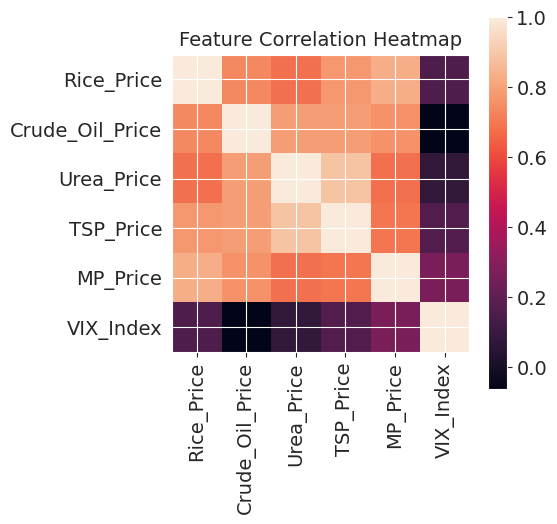

In [ ]:
def show_heatmap(data):
    plt.matshow(data.corr())
    plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=90)
    plt.gca().xaxis.tick_bottom()
    plt.yticks(range(data.shape[1]), data.columns, fontsize=14)

    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title("Feature Correlation Heatmap", fontsize=14)
    plt.show()


show_heatmap(price_df)

#### **Scale Data**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler = scaler.fit(price_df)
df_scaled = scaler.transform(price_df)
df_scaled.shape

(362, 6)

##### **Convert Series to Supervised Learning**

As required for LSTM networks, we require to reshape an input data into n_samples x timesteps x n_features. In this example, the n_features is 5. We will make timesteps = 6 (past six month  used for training).

In [ ]:
#As required for LSTM networks, we require to reshape an input data into n_samples x timesteps x n_features.
#In this example, the n_features is 5. We will make timesteps = 6(past months data used for training).

#Empty lists to be populated using formatted training data
X_data = []
y_data = []
month=[]
month_df=df['MONTH']

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 6  # Number of past days we want to use to predict the future.

#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_for_training_scaled has a shape (12823, 5)
#12823 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(n_past, len(df_scaled) - n_future +1):
    X_data.append(df_scaled[i - n_past:i, 0:df_scaled.shape[1]])
    y_data.append(df_scaled[i + n_future - 1:i + n_future, 0])
    month.append(month_df[i + n_future-1:i + n_future])

X_data, y_data, month = np.array(X_data), np.array(y_data), np.array(month)
month.shape, X_data.shape, y_data.shape

((356, 1), (356, 6, 6), (356, 1))

### **Split Data to Training/Validation/Test**

In [ ]:
np.random.seed(7)

q_80 = int(len(df['MONTH']) * .8)
q_90 = int(len(df['MONTH']) * .9)

month_train, X_train, y_train = month[:q_80], X_data[:q_80], y_data[:q_80]

month_val, X_val, y_val = month[q_80:q_90], X_data[q_80:q_90], y_data[q_80:q_90]

month_test, X_test, y_test = month[q_90:], X_data[q_90:], y_data[q_90:]

month_train.shape, X_train.shape, y_train.shape, month_val.shape, X_val.shape, y_val.shape, month_test.shape, X_test.shape, y_test.shape

((289, 1),
 (289, 6, 6),
 (289, 1),
 (36, 1),
 (36, 6, 6),
 (36, 1),
 (31, 1),
 (31, 6, 6),
 (31, 1))

#### Plot Training/Validation and Test data

In [ ]:
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default='colab'

fig = go.Figure()
fig.add_traces(go.Scatter(x = month_train.flatten(), y= y_train.flatten(), mode='markers', name='Training Data'))
fig.add_traces(go.Scatter(x = month_val.flatten(), y=y_val.flatten(), mode='markers', name='Validation Data'))
fig.add_traces(go.Scatter(x = month_test.flatten(), y=y_test.flatten(), mode='markers', name='Test Data'))
fig.update_layout(width=800, height=600,
                      xaxis_title = "Months", yaxis_title = "Std. Price",
                      title = {"text": "Training, Validation & Test Data", "x":0.5, "pad": {'b':0, 'l':0, 't':0, 'r':0}},
                      legend = {'yanchor':'top', 'y':0.99, 'xanchor':'left', 'x':0.10})

### **Fit the the Model**

In [ ]:
# Create and train the LSTM model
input_dim = X_train.shape[1]
hidden_dim = 100
output_dim = 1
learning_rate = 0.001
epochs = 200
batch_size = 32

lstm = LSTM(input_dim, hidden_dim, output_dim, learning_rate)
lstm.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)

Epoch 10/200, Loss: 0.1322
Epoch 20/200, Loss: 0.0905
Epoch 30/200, Loss: 0.0658
Epoch 40/200, Loss: 0.0528
Epoch 50/200, Loss: 0.0477
Epoch 60/200, Loss: 0.0480
Epoch 70/200, Loss: 0.0515
Epoch 80/200, Loss: 0.0569
Epoch 90/200, Loss: 0.0630
Epoch 100/200, Loss: 0.0692
Epoch 110/200, Loss: 0.0750
Epoch 120/200, Loss: 0.0801
Epoch 130/200, Loss: 0.0845
Epoch 140/200, Loss: 0.0881
Epoch 150/200, Loss: 0.0909
Epoch 160/200, Loss: 0.0931
Epoch 170/200, Loss: 0.0948
Epoch 180/200, Loss: 0.0959
Epoch 190/200, Loss: 0.0966
Epoch 200/200, Loss: 0.0970


### **Model Performance**

In [ ]:
# Training
# Prediction
y_train_pred= lstm.predict(X_train)
# Invers-transformation of Predicted Data
train_predicted_copies = np.repeat(y_train_pred, price_df.shape[1], axis=-1)
train_predicted = scaler.inverse_transform(train_predicted_copies)[:,0]
# Invers-transformation of Observed Data
train_observed_copies = np.repeat(y_train, price_df.shape[1], axis=-1)
train_observed = scaler.inverse_transform(train_observed_copies)[:,0]
train_pred_df = pd.DataFrame({"Predicted":train_predicted, "Observed": train_observed})
train_pred_df["MONTHS"]=month_train.flatten()
y_train_pred.shape, train_pred_df.head()

((289, 1),
     Predicted  Observed  MONTHS
 0  248.716341    257.00  Sep-92
 1  247.973579    250.00  Oct-92
 2  245.141155    252.60  Nov-92
 3  244.725549    256.25  Dec-92
 4  244.926980    259.75  Jan-93)

In [ ]:
# Vlidation Data
# Prediction
y_val_pred= lstm.predict(X_val)
# Invers-transformation of Predicted Data
val_predicted_copies = np.repeat(y_val_pred, price_df.shape[1], axis=-1)
val_predicted = scaler.inverse_transform(val_predicted_copies)[:,0]
# Invers-transformation of Observed Data
val_observed_copies = np.repeat(y_val, price_df.shape[1], axis=-1)
val_observed = scaler.inverse_transform(val_observed_copies)[:,0]
val_pred_df = pd.DataFrame({"Predicted":val_predicted, "Observed": val_observed})
val_pred_df["MONTHS"]=month_val.flatten()
val_pred_df.head()

,Predicted,Observed,MONTHS
0,365.726620,369.0,16-Oct
1,359.766271,365.0,16-Nov
2,355.491375,373.0,16-Dec
3,357.188036,377.0,17-Jan
4,358.556824,367.0,17-Feb


In [ ]:
# Test data
# Prediction
y_test_pred= lstm.predict(X_test)
# Invers-transformation of Predicted Data
test_predicted_copies = np.repeat(y_test_pred, price_df.shape[1], axis=-1)
test_predicted = scaler.inverse_transform(test_predicted_copies)[:,0]
# Invers-transformation of Observed Data
test_observed_copies = np.repeat(y_test, price_df.shape[1], axis=-1)
test_observed = scaler.inverse_transform(test_observed_copies)[:,0]
test_pred_df = pd.DataFrame({"Predicted":test_predicted, "Observed": test_observed})
test_pred_df["MONTHS"]=month_test.flatten()
test_pred_df.head()

,Predicted,Observed,MONTHS
0,399.289488,424.0,19-Oct
1,396.175928,421.0,19-Nov
2,393.394930,432.0,19-Dec
3,392.288906,451.0,20-Jan
4,390.836282,450.0,20-Feb


### **Model Evaluation**

In [ ]:
train_metrics = all_metrics(train_pred_df, method_name='Training')
val_metrics = all_metrics(val_pred_df, method_name='Validation')
test_metrics = all_metrics(test_pred_df, method_name='Test')

# combining all metrics dataframe
model_metrics = pd.concat([train_metrics, val_metrics, test_metrics])
model_metrics

,MAE,MAPE,MSE,RMSE,SMAPE
Training,39.427,0.125,2737.980,52.326,0.124
Validation,21.901,0.052,875.613,29.591,0.055
Test,84.035,0.179,8521.824,92.314,0.183


In [ ]:
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default='colab'

fig = go.Figure()
fig.add_traces(go.Scatter(x = train_pred_df["MONTHS"], y = train_pred_df["Observed"], mode='markers',  name='Training Observed'))
fig.add_traces(go.Scatter(x = train_pred_df["MONTHS"],y = train_pred_df["Predicted"], mode='lines', name='Training Prediction'))
fig.add_traces(go.Scatter(x = val_pred_df["MONTHS"], y = val_pred_df["Observed"], mode='markers',  name='Validation  Observed'))
fig.add_traces(go.Scatter(x = val_pred_df["MONTHS"], y = val_pred_df["Predicted"], mode='lines', name='Validation Prediction'))
fig.add_traces(go.Scatter(x = test_pred_df["MONTHS"], y = test_pred_df["Observed"], mode='markers',  name='Test  Observed'))
fig.add_traces(go.Scatter(x = test_pred_df["MONTHS"], y = test_pred_df["Predicted"], mode='lines', name='Test Prediction'))
#fig.add_traces(go.Scatter(x = month_test.flatten(), y=y_test.flatten(), mode='lines', name='Test Data'))
fig.update_layout(width=900, height=600,
                      xaxis_title = "Months", yaxis_title = "Wheat Price (US$/Mt)",
                      title = {"text": "Global Wheat Price: Keras/TensorFlow-Multivariate LSTM", "x":0.5, "pad": {'b':0, 'l':0, 't':0, 'r':0}},
                      legend = {'yanchor':'top', 'y':0.99, 'xanchor':'left', 'x':0.10})

## **Summary and Conclusions**

### Concluding Remarks

In this tutorial, we explored the implementation of univariate and multivariate time series forecasting using Long Short-Term Memory (LSTM) networks from scratch in Python. Here are the key takeaways from our journey:

1. **Understanding LSTM Networks**:

2. **Data Preparation**:

3. **Building LSTM from Scratch**:

4. **Training the Model**:

5. **Evaluation Metrics**:

6. **Prediction and Inverse Transformation**:

7. **Visualizing Results**:


Implementing LSTM networks from scratch provides a deep understanding of how these models work under the hood. It also gives you the flexibility to customize the model according to specific requirements. While high-level libraries like Keras and TensorFlow offer convenience and efficiency, building models from scratch enhances your foundational knowledge and problem-solving skills.

Time series forecasting is a powerful tool with applications in various domains such as finance, healthcare, and supply chain management. By mastering LSTM networks, you can leverage this technique to make accurate predictions and informed decisions based on historical data.

We hope this tutorial has provided you with valuable insights and hands-on experience in building and training LSTM models for time series forecasting. Keep experimenting with different architectures and hyperparameters to improve your models further. Happy coding!

## **Additional Resources**


## **Books**

1. **Deep Learning for Time Series Forecasting" by Jason Brownlee**
   - **Description**: This book provides a comprehensive guide to deep learning methods for time series forecasting. It covers the use of LSTM networks and other architectures, offering practical examples and code snippets.
   - **Key Topics**: LSTM networks, time series data preparation, model evaluation, and advanced topics like multivariate forecasting.
   - **Why Read It**: Jason Brownlee is well-known for his practical, hands-on approach, making complex topics accessible.

2. **"Hands-On Time Series Analysis with R: Perform time series analysis and forecasting using R" by Rami Krispin**
   - **Description**: While this book primarily focuses on R, it provides a solid foundation for understanding time series analysis and forecasting, including the use of deep learning models like LSTM.
   - **Key Topics**: Time series decomposition, ARIMA, exponential smoothing, LSTM, and neural network models.
   - **Why Read It**: It offers a comprehensive approach to time series analysis, making it easier to transition concepts to other languages like Python.

 3. **"Deep Learning with Python" by François Chollet**
   - **Description**: Written by the creator of Keras, this book covers a wide range of deep learning topics, including time series forecasting with LSTM.
   - **Key Topics**: Deep learning fundamentals, LSTM networks, sequence modeling, and practical examples using Keras.
   - **Why Read It**: This book provides insights from one of the leading experts in deep learning, with a focus on practical applications.

4. **"Neural Networks for Time Series Forecasting: Practical Guide with Applications in Python" by N. Lewis**
   - **Description**: This book focuses specifically on using neural networks for time series forecasting, with practical examples and applications in Python.
   - **Key Topics**: Neural network architectures, LSTM, GRU, data preprocessing, and model evaluation.
   - **Why Read It**: It provides a practical guide with a focus on Python, making it easier to implement and understand the concepts.

5. **"Time Series Forecasting in Python: Deep Learning with LSTMs, GRUs, and Attention Mechanisms" by Marco Peixeiro**
   - **Description**: This book covers advanced deep learning techniques for time series forecasting, including LSTM, GRU, and attention mechanisms.
   - **Key Topics**: Time series forecasting, deep learning architectures, LSTM, GRU, attention mechanisms, and practical implementation in Python.
   - **Why Read It**: It offers a deep dive into advanced techniques with a focus on practical implementation, making it ideal for those looking to enhance their forecasting models.

6. **"Python Deep Learning: Exploring deep learning techniques and neural network architectures with PyTorch, Keras, and TensorFlow, 2nd Edition" by Ivan Vasilev, Daniel Slater, Gianmario Spacagna, Peter Roelants, Valentino Zocca**
   - **Description**: This book provides a comprehensive guide to deep learning using popular libraries like PyTorch, Keras, and TensorFlow, including applications in time series forecasting.
   - **Key Topics**: Deep learning fundamentals, neural network architectures, LSTM, and practical examples using various deep learning frameworks.
   - **Why Read It**: It covers a wide range of deep learning topics with practical examples, making it a valuable resource for implementing and understanding time series forecasting.

## **Online Tutorial**

Here are some useful links to learn more about time series forecasting with LSTM:

1. **Understanding LSTM Networks**
   - [Understanding LSTM Networks](https://colah.github.io/posts/2015-08-Understanding-LSTMs/) - A great article by Christopher Olah that explains the concepts behind LSTM networks.

2. **Keras Documentation**
   - [Time Series Forecasting with LSTM using Keras](https://keras.io/examples/timeseries/timeseries_weather_forecasting/) - An example from the Keras documentation on how to use LSTM for time series forecasting.

3. **TensorFlow Tutorials**
   - [Time Series Forecasting](https://www.tensorflow.org/tutorials/structured_data/time_series) - A comprehensive tutorial from TensorFlow on how to forecast time series data using LSTM.

4. **Towards Data Science Articles**
   - [Time Series Forecasting using LSTM in Python](https://towardsdatascience.com/time-series-forecasting-with-recurrent-neural-networks-74674e289816) - An article on Towards Data Science that walks through the process of forecasting time series data using LSTM.
   - [A Comprehensive Guide to Time Series Analysis and Forecasting](https://towardsdatascience.com/a-comprehensive-guide-to-time-series-analysis-and-forecasting-70d476bfe775) - This guide includes sections on using LSTM for time series forecasting.

5. **Machine Learning Mastery**
   - [How to Develop LSTM Models for Time Series Forecasting](https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/) - A detailed tutorial by Jason Brownlee on developing LSTM models for time series forecasting.
   - [Time Series Forecasting with the Long Short-Term Memory Network in Python](https://machinelearningmastery.com/time-series-forecasting-long-short-term-memory-network-python/) - Another great article by Jason Brownlee focusing on LSTM networks for time series forecasting.

These resources provide a mix of theoretical background, practical implementation, and examples to help you get started with time series forecasting using LSTM networks.